In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fraud data

In [11]:
fraud = pd.read_csv("Fraud_check.csv")

In [3]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [5]:
label_encoder = preprocessing.LabelEncoder()

In [6]:
fraud['Undergrad'] = label_encoder.fit_transform(fraud['Undergrad'])
fraud['urban'] = label_encoder.fit_transform(fraud['Urban'])
fraud['Marital.Status'] = label_encoder.fit_transform(fraud['Marital.Status'])

In [7]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,urban
0,0,2,68833,50047,10,YES,1
1,1,0,33700,134075,18,YES,1
2,0,1,36925,160205,30,YES,1
3,1,2,50190,193264,15,YES,1
4,0,1,81002,27533,28,NO,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,YES,1
596,1,0,69967,55369,2,YES,1
597,0,0,47334,154058,0,YES,1
598,1,1,98592,180083,17,NO,0


In [8]:
x = fraud.iloc[:,0:5]
y = fraud.iloc[:,-1]

In [9]:
x

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience
0,0,2,68833,50047,10
1,1,0,33700,134075,18
2,0,1,36925,160205,30
3,1,2,50190,193264,15
4,0,1,81002,27533,28
...,...,...,...,...,...
595,1,0,76340,39492,7
596,1,0,69967,55369,2
597,0,0,47334,154058,0
598,1,1,98592,180083,17


In [10]:
y

0      1
1      1
2      1
3      1
4      0
      ..
595    1
596    1
597    1
598    0
599    0
Name: urban, Length: 600, dtype: int32

In [11]:

#spliting data into training and testing data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2, random_state = 10)

In [12]:
#Building Descision tree Classifier using entropy criteria
model = DecisionTreeClassifier(criterion ='entropy',max_depth =2)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[2] <= 68794.5\nentropy = 1.0\nsamples = 480\nvalue = [236, 244]'),
 Text(0.25, 0.5, 'x[2] <= 10662.5\nentropy = 0.995\nsamples = 313\nvalue = [170, 143]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.992\nsamples = 307\nvalue = [170, 137]'),
 Text(0.75, 0.5, 'x[3] <= 97319.5\nentropy = 0.968\nsamples = 167\nvalue = [66, 101]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.863\nsamples = 84\nvalue = [24, 60]'),
 Text(0.875, 0.16666666666666666, 'entropy = 1.0\nsamples = 83\nvalue = [42, 41]')]

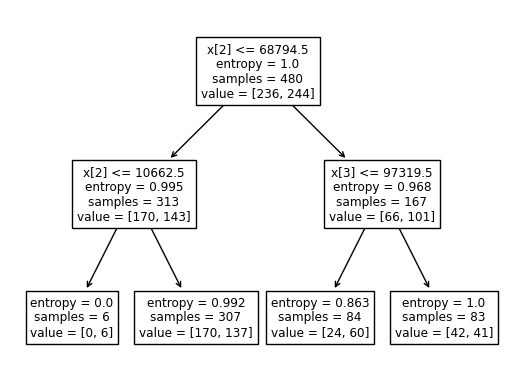

In [13]:
#plot the DecisionTree
tree.plot_tree(model)

[Text(0.5, 0.8333333333333334, 'Taxable.Income <= 68794.5\nentropy = 1.0\nsamples = 480\nvalue = [236, 244]'),
 Text(0.25, 0.5, 'Taxable.Income <= 10662.5\nentropy = 0.995\nsamples = 313\nvalue = [170, 143]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.992\nsamples = 307\nvalue = [170, 137]'),
 Text(0.75, 0.5, 'City.Population <= 97319.5\nentropy = 0.968\nsamples = 167\nvalue = [66, 101]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.863\nsamples = 84\nvalue = [24, 60]'),
 Text(0.875, 0.16666666666666666, 'entropy = 1.0\nsamples = 83\nvalue = [42, 41]')]

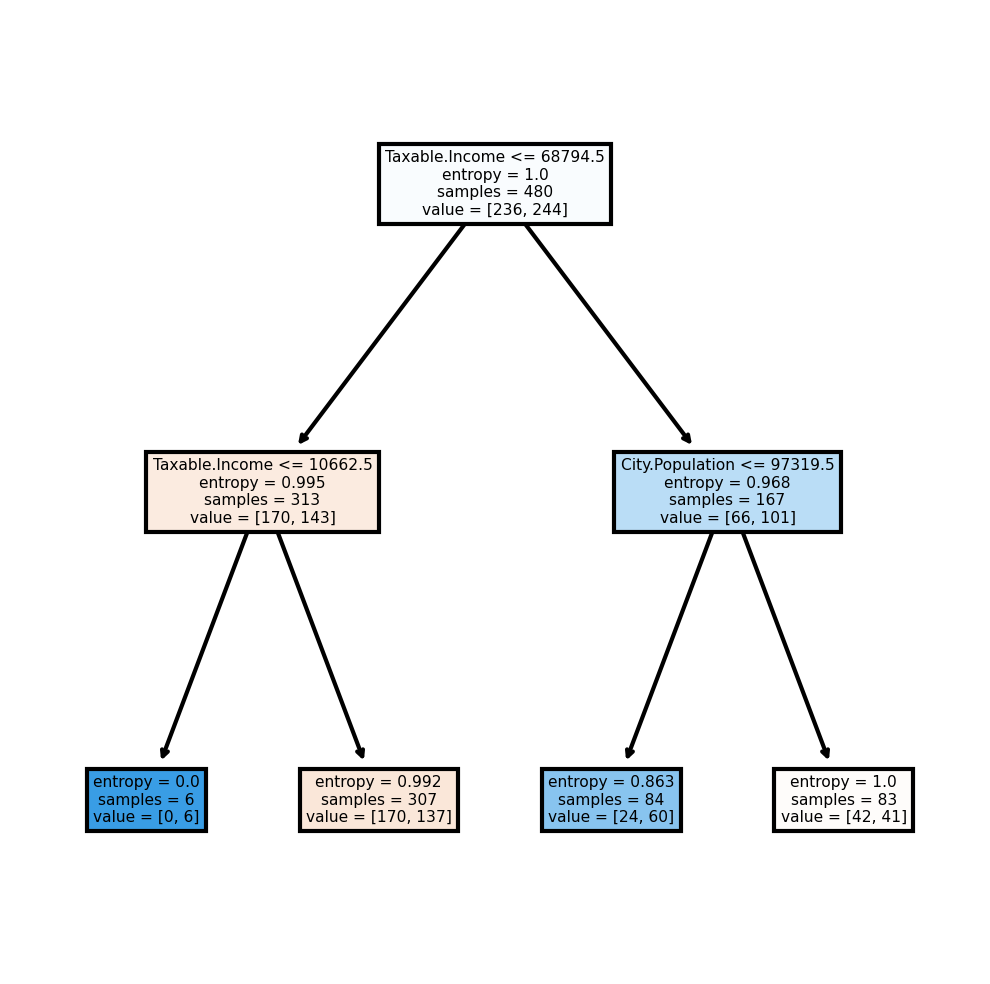

In [14]:
fn = ['Undergrad','Marital.Status','Taxable.Income','City.Population']
fig,axes = plt.subplots(nrows = 1,ncols = 1,figsize=(4,4),dpi =300)
tree.plot_tree(model,
              feature_names = fn,
              filled = True)


In [15]:
#predicting on test data 
preds=model.predict(x_test)

In [16]:
pd.Series(preds).value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      1
3      0
4      1
      ..
115    0
116    0
117    0
118    0
119    0
Length: 120, dtype: int32>

In [17]:
preds

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
#Accuracy
np.mean(preds ==y_test)

0.5166666666666667

In [19]:
#Building Descision tree Classifier using Gini criteria
from sklearn.tree import DecisionTreeClassifier

In [20]:
model_gini = DecisionTreeClassifier(criterion ='gini')
model_gini.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
#predicting and computing the Accuracy
preds = model.predict(x_test)
np.mean(preds)


0.2

In [22]:
model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [23]:
#Find Accuracy
model2.score(x_test,y_test)

0.48333333333333334

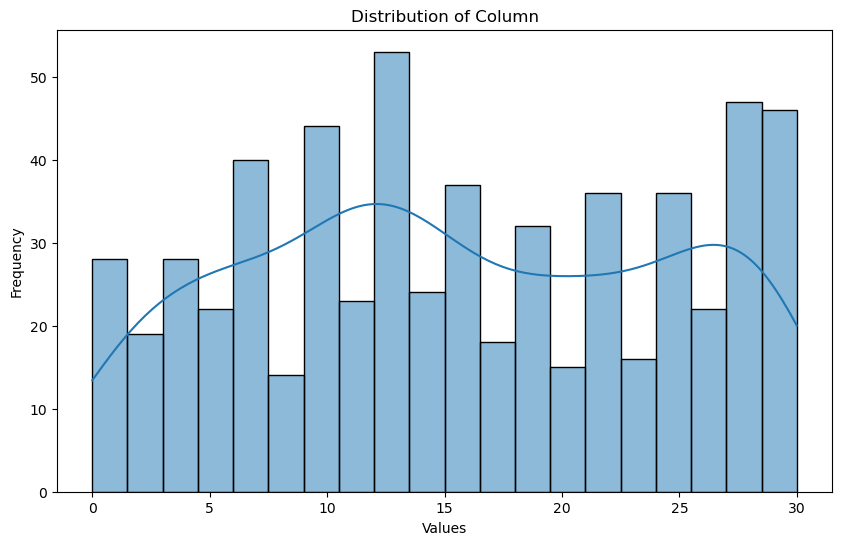

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot a histogram for a specific column
plt.figure(figsize=(10, 6))
sns.histplot(fraud['Work.Experience'], bins=20, kde=True)
plt.title('Distribution of Column')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


 for this the workexperience will patter alot. 

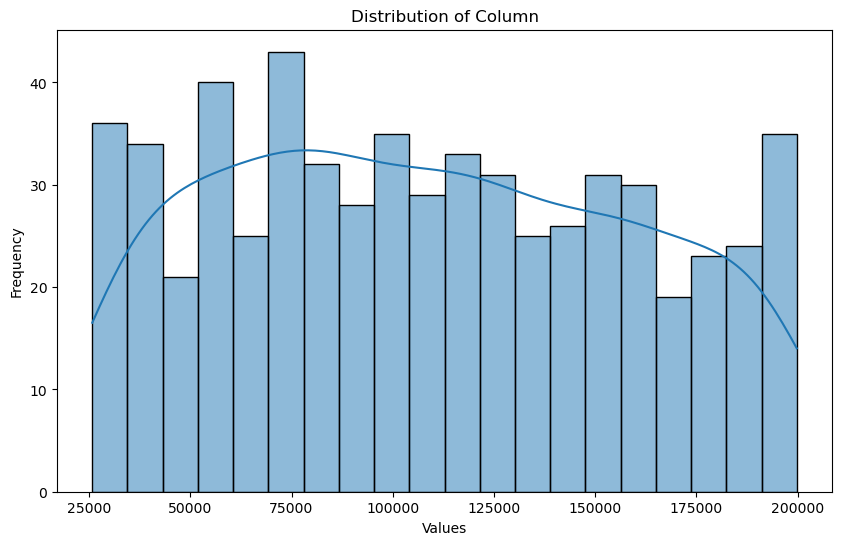

In [4]:
# Plot a histogram for a specific column
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(fraud['City.Population'], bins=20, kde=True)
plt.title('Distribution of Column')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

this as the high fluctuation .

C:\Users\anura\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


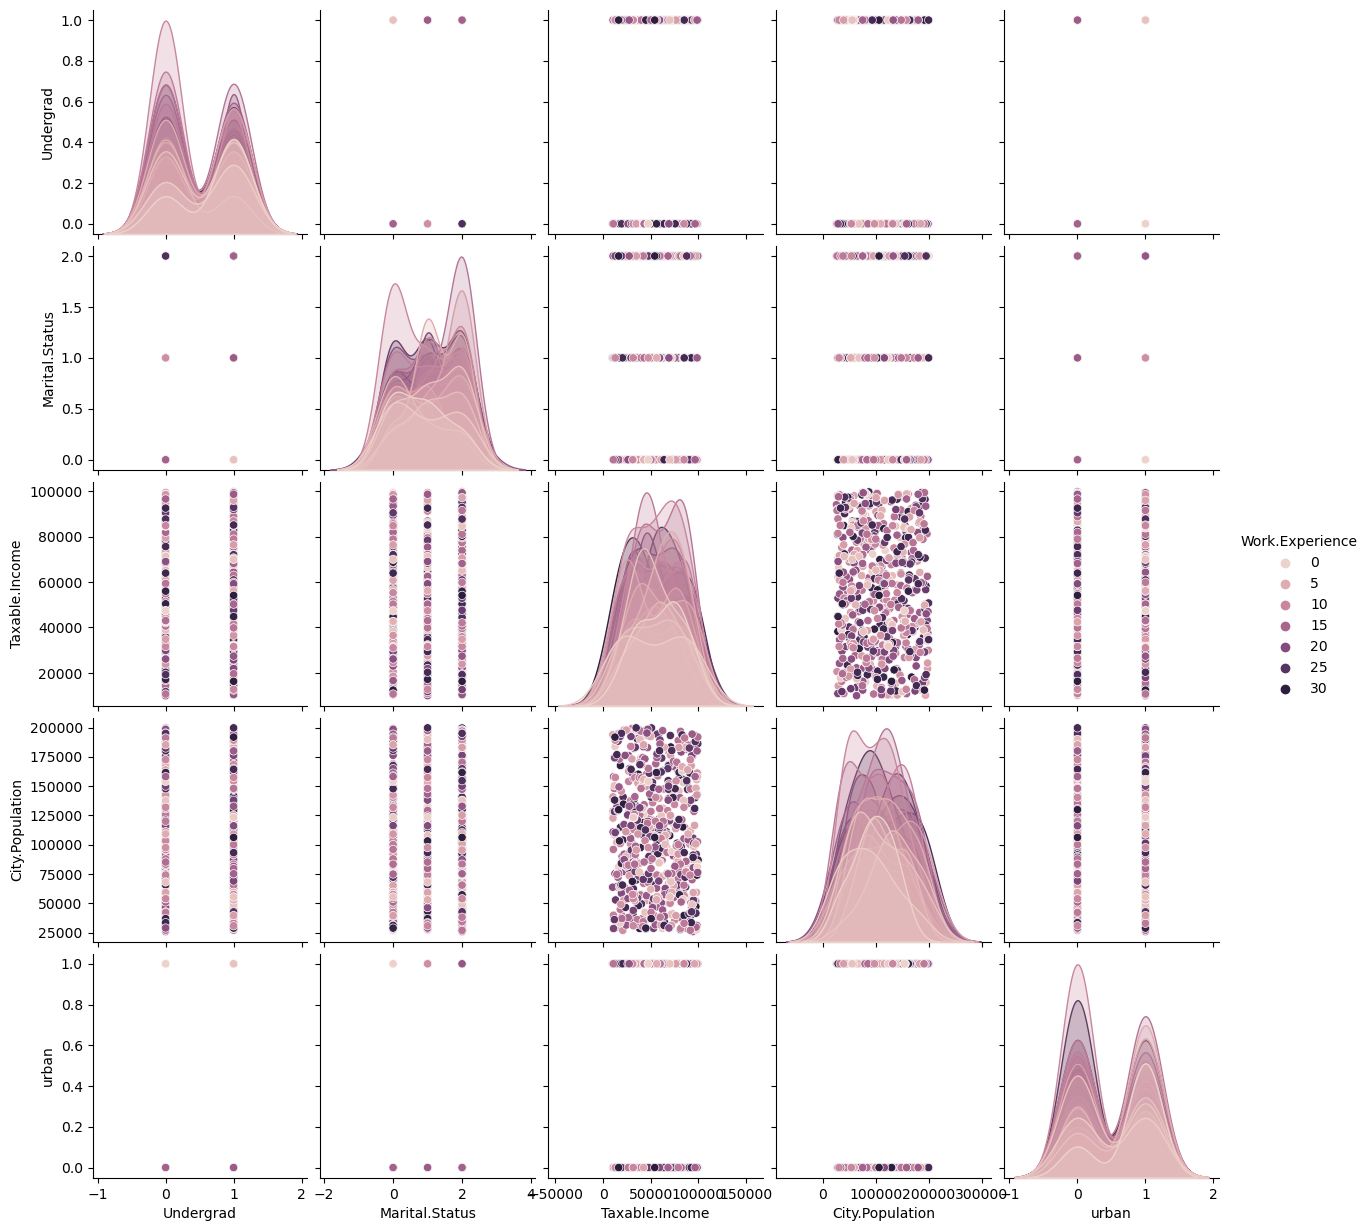

In [26]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=fraud, hue = 'Work.Experience')

# company data

In [5]:
company = pd.read_csv('Company_Data.csv')

In [28]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [29]:
company['ShelveLoc'] = label_encoder.fit_transform(company['ShelveLoc'])
company['Urban'] = label_encoder.fit_transform(company['Urban'])
company['US'] = label_encoder.fit_transform(company['US'])

In [30]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [31]:
x = company.iloc[:,1:-1]
y = company.iloc[:,1]

In [32]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban
0,138,73,11,276,120,0,42,17,1
1,111,48,16,260,83,1,65,10,1
2,113,35,10,269,80,2,59,12,1
3,117,100,4,466,97,2,55,14,1
4,141,64,3,340,128,0,38,13,1
...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1
396,139,23,3,37,120,2,55,11,0
397,162,26,12,368,159,2,40,18,1
398,100,79,7,284,95,0,50,12,1


In [33]:
y

0      138
1      111
2      113
3      117
4      141
      ... 
395    138
396    139
397    162
398    100
399    134
Name: CompPrice, Length: 400, dtype: int64

In [34]:
#spliting data into training and testing data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2, random_state = 10)

In [35]:
#Building Descision tree Classifier using entropy criteria
model1 = DecisionTreeClassifier(criterion ='entropy',max_depth =10)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

[Text(0.5210129310344828, 0.9444444444444444, 'x[0] <= 125.5\nentropy = 5.832\nsamples = 320\nvalue = [1, 1, 1, 2, 3, 1, 1, 2, 1, 5, 2, 1, 2, 4\n3, 4, 8, 4, 5, 3, 7, 5, 6, 4, 8, 9, 7, 8\n5, 4, 13, 10, 9, 6, 7, 4, 5, 8, 3, 11, 11, 9\n7, 9, 5, 6, 6, 9, 7, 4, 6, 4, 4, 4, 3, 3\n4, 3, 4, 4, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1]'),
 Text(0.3348599137931034, 0.8333333333333334, 'x[0] <= 115.5\nentropy = 4.815\nsamples = 162\nvalue = [1, 1, 1, 2, 3, 1, 1, 2, 1, 5, 2, 1, 2, 4\n3, 4, 8, 4, 5, 3, 7, 5, 6, 4, 8, 9, 7, 8\n5, 4, 13, 10, 9, 6, 7, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.23006465517241378, 0.7222222222222222, 'x[0] <= 107.5\nentropy = 4.342\nsamples = 84\nvalue = [1, 1, 1, 2, 3, 1, 1, 2, 1, 5, 2, 1, 2, 4\n3, 4, 8, 4, 5, 3, 7, 5, 6, 4, 8, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.1497844827586207, 0.6111111111111112, 

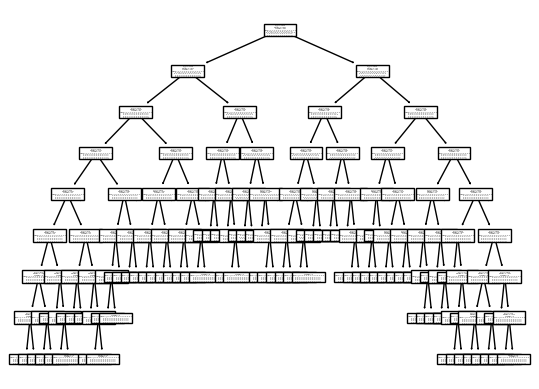

In [36]:
#plot the DecisionTree
tree.plot_tree(model1)

[Text(0.5, 0.8333333333333334, 'Population <= 68794.5\nentropy = 1.0\nsamples = 480\nvalue = [236, 244]'),
 Text(0.25, 0.5, 'Population <= 10662.5\nentropy = 0.995\nsamples = 313\nvalue = [170, 143]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.992\nsamples = 307\nvalue = [170, 137]'),
 Text(0.75, 0.5, 'Price <= 97319.5\nentropy = 0.968\nsamples = 167\nvalue = [66, 101]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.863\nsamples = 84\nvalue = [24, 60]'),
 Text(0.875, 0.16666666666666666, 'entropy = 1.0\nsamples = 83\nvalue = [42, 41]')]

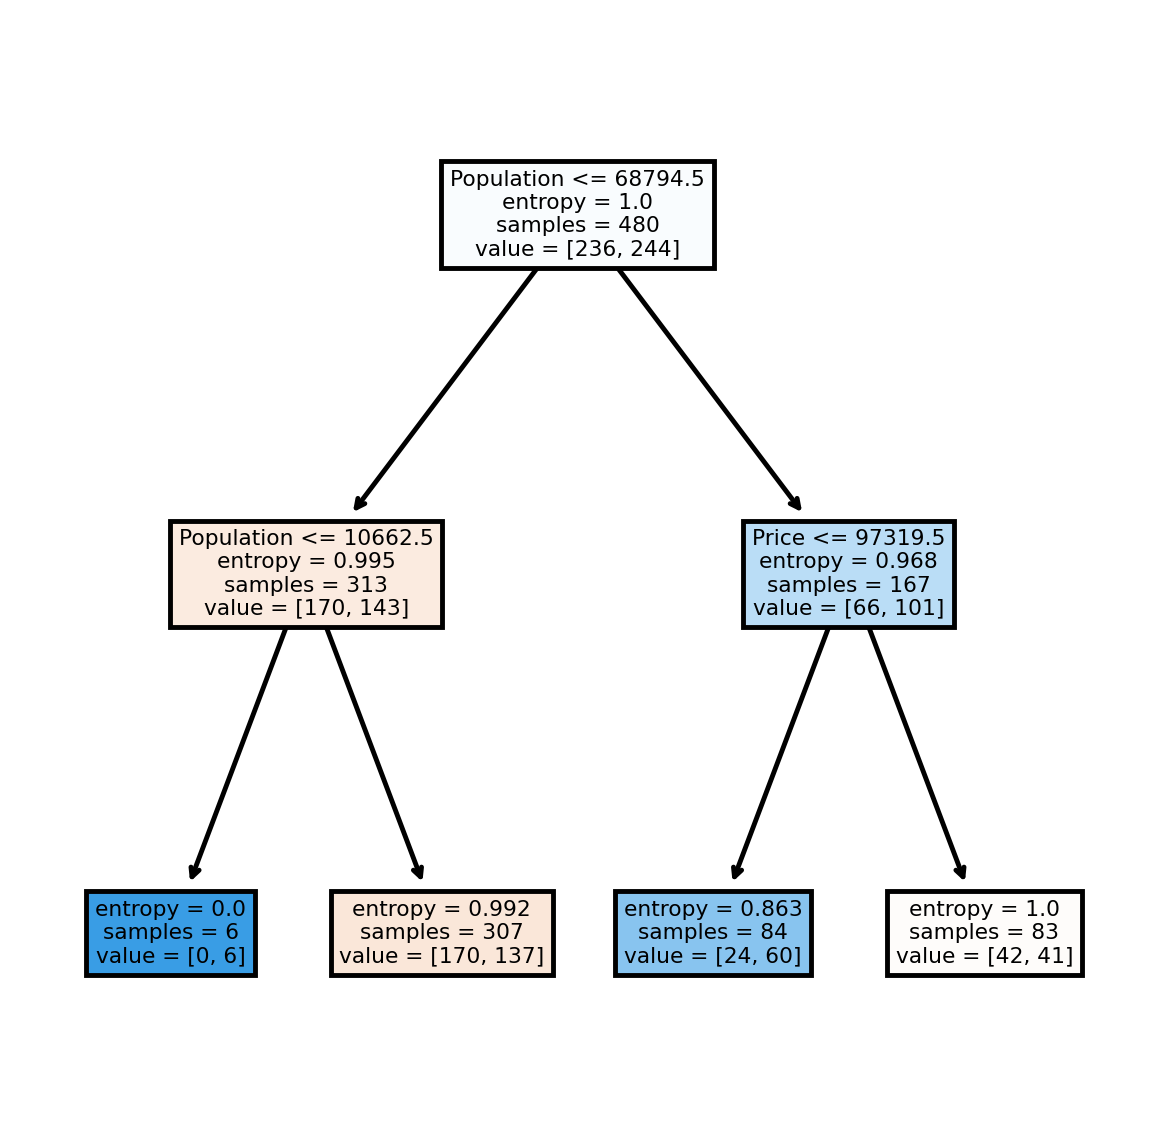

In [37]:
fn = ['Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban']
fig,axes = plt.subplots(nrows = 1,ncols = 1,figsize=(4,4),dpi =350)
tree.plot_tree(model,
              feature_names = fn,
              filled = True)


In [39]:

#predicting on test data 
preds=model1.predict(x_test)
pd.Series(preds).value_counts

<bound method IndexOpsMixin.value_counts of 0     106
1     132
2     133
3     113
4     133
     ... 
75    123
76    117
77    119
78    100
79     98
Length: 80, dtype: int64>

In [41]:
preds

array([106, 132, 133, 113, 133, 125, 116, 115, 124, 128, 130, 104, 137,
       135, 145, 135, 134, 122, 123, 134, 126, 104, 124, 121, 124, 131,
       136, 124, 108, 100, 111, 115, 118, 107, 135, 135,  93,  77, 129,
       125, 111, 129, 127, 121, 118, 108, 133, 132, 131, 122, 162, 119,
       131, 122, 132, 123, 128, 117, 114, 116, 104, 125, 122, 136, 123,
       149, 152, 113, 115, 115, 125, 146, 121, 128, 151, 123, 117, 119,
       100,  98], dtype=int64)

In [42]:
#Accuracy
np.mean(preds ==y_test)

0.9125

In [43]:
#Building Descision tree Classifier using Gini criteria
from sklearn.tree import DecisionTreeClassifier

In [44]:
model_gini = DecisionTreeClassifier(criterion ='gini')
model_gini.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
#predicting and computing the Accuracy
preds = model1.predict(x_test)
np.mean(preds)

123.0625

In [46]:
model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [47]:
#Find Accuracy
model2.score(x_test,y_test)

0.9375

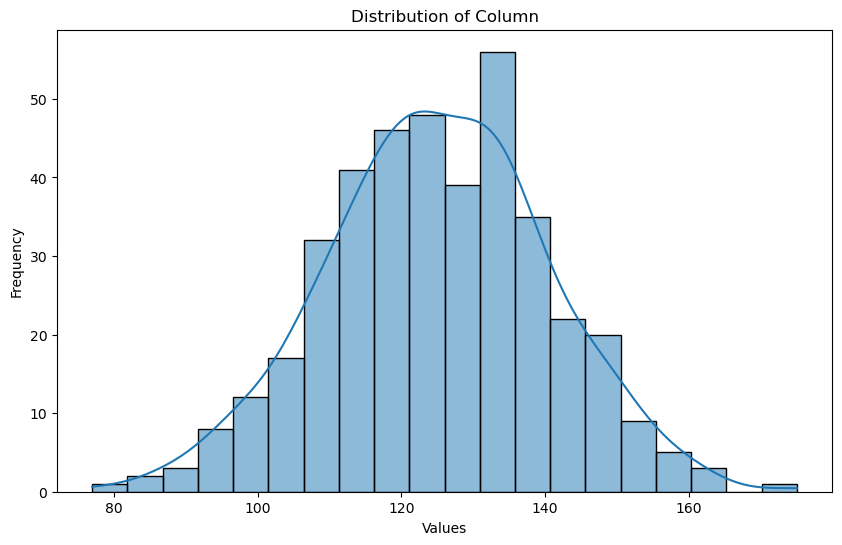

In [49]:
# Plot a histogram for a specific column
plt.figure(figsize=(10, 6))
sns.histplot(company['CompPrice'], bins=20, kde=True)
plt.title('Distribution of Column')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


For the high compprice there will be high price and vica versa.

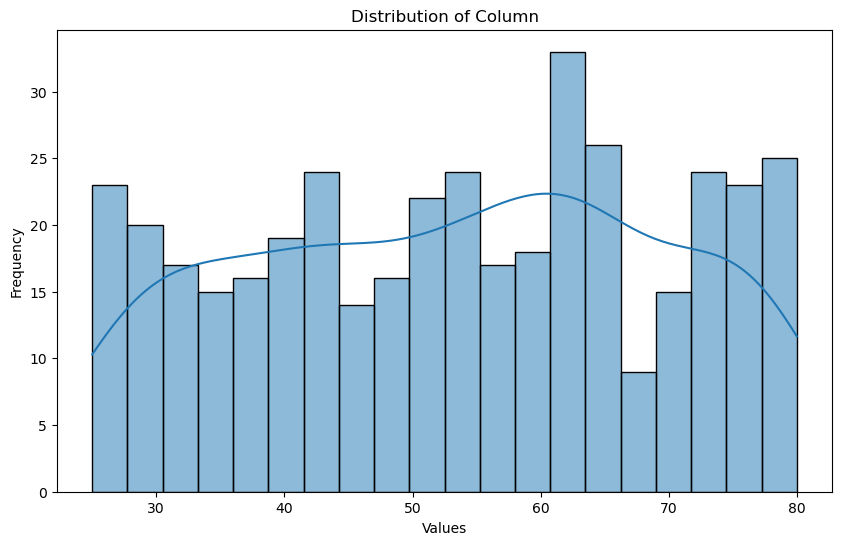

In [6]:
# Plot a histogram for a specific column
plt.figure(figsize=(10, 6))
sns.histplot(company['Age'], bins=20, kde=True)
plt.title('Distribution of Column')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


we can not say anythig about this because for age the frequecy is varing in unorder..

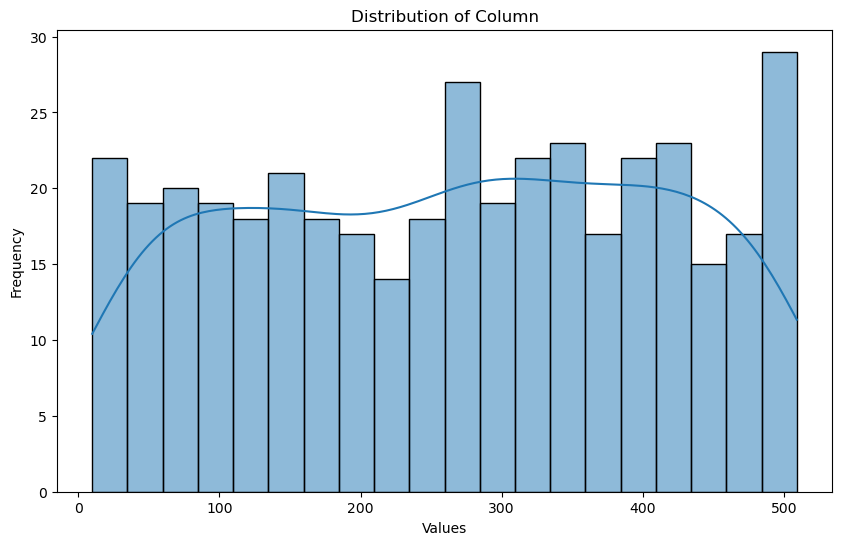

In [8]:
# Plot a histogram for a specific column
plt.figure(figsize=(10, 6))
sns.histplot(company['Population'], bins=20, kde=True)
plt.title('Distribution of Column')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


for 500 poplation frequacy is very high and for 200 population frequecy is very low.

C:\Users\anura\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


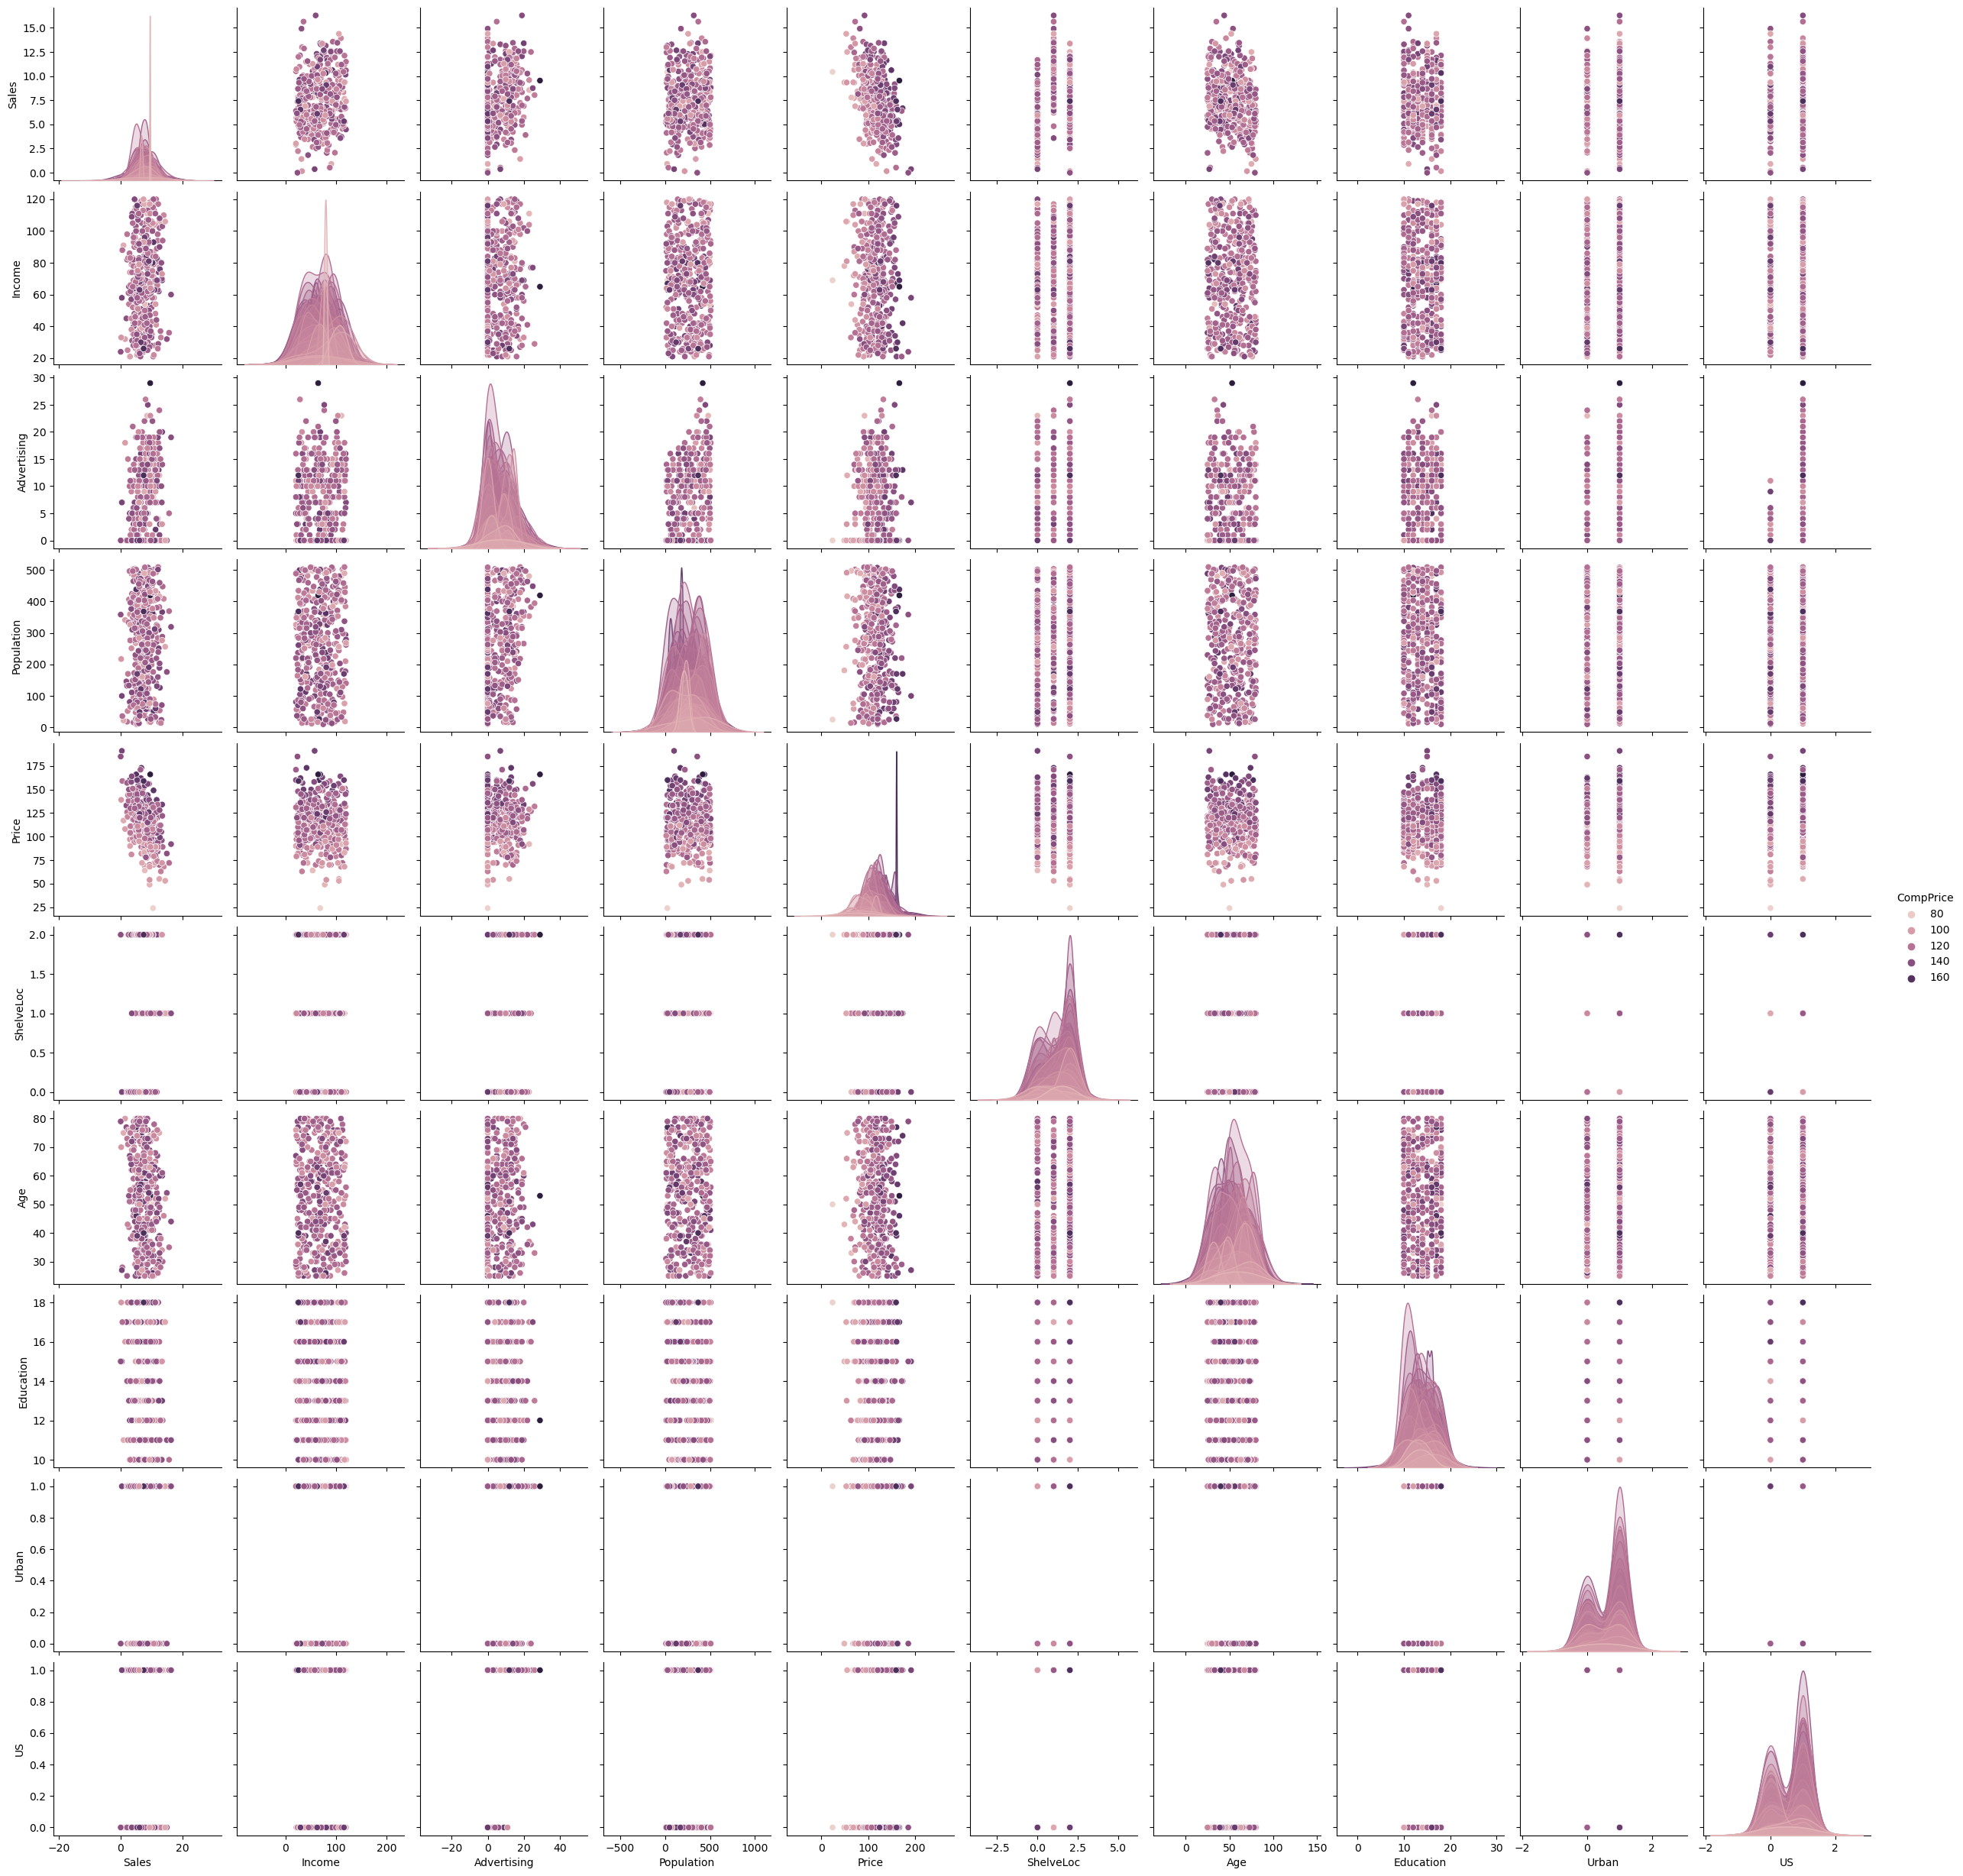

In [37]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=company, hue = 'CompPrice')